# Sales Analysis

## 1. Import Data

12 csv files needed to import and merge as one file

In [227]:
import warnings
warnings.filterwarnings('ignore')

In [228]:
import pandas as pd
import os
import glob

In [229]:
# get a list of the csv files
files = glob.glob("*SalesAnalysis/*")
file_list = [file for file in files]
file_list

['SalesAnalysis\\Sales_April_2019.csv',
 'SalesAnalysis\\Sales_August_2019.csv',
 'SalesAnalysis\\Sales_December_2019.csv',
 'SalesAnalysis\\Sales_February_2019.csv',
 'SalesAnalysis\\Sales_January_2019.csv',
 'SalesAnalysis\\Sales_July_2019.csv',
 'SalesAnalysis\\Sales_June_2019.csv',
 'SalesAnalysis\\Sales_March_2019.csv',
 'SalesAnalysis\\Sales_May_2019.csv',
 'SalesAnalysis\\Sales_November_2019.csv',
 'SalesAnalysis\\Sales_October_2019.csv',
 'SalesAnalysis\\Sales_September_2019.csv']

In [230]:
# get a list of lists of the dataframes
dfs = file_list[:]

for index, file in enumerate(files):
    dfs[index] = pd.read_csv(file)

In [231]:
# now combine all dfs into one df
combined = pd.concat(dfs, axis=0, ignore_index=True)

In [232]:
combined.shape

(186850, 6)

In [233]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [234]:
combined['Product'].unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [235]:
combined.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## 2. Clean Data

### 2.1 Remove Nulls

In [236]:
combined.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [237]:
combined[combined.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
combined = combined.dropna(how='any')

In [239]:
combined.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [240]:
combined.shape

(186305, 6)

### 2.2 Change data types to correct data type: objects to int, float, datetime

#### 2.21 Order ID and Quantity Ordered to int

In [241]:
combined['Order ID'].to_list()

['176558',
 '176559',
 '176560',
 '176560',
 '176561',
 '176562',
 '176563',
 '176564',
 '176565',
 '176566',
 '176567',
 '176568',
 '176569',
 '176570',
 '176571',
 '176572',
 '176573',
 '176574',
 '176574',
 '176575',
 '176576',
 '176577',
 '176578',
 '176579',
 '176580',
 '176581',
 '176582',
 '176583',
 '176584',
 '176585',
 '176585',
 '176586',
 '176586',
 '176587',
 '176588',
 '176589',
 '176590',
 '176591',
 '176592',
 '176593',
 '176594',
 '176595',
 '176596',
 '176597',
 '176598',
 '176599',
 '176600',
 '176601',
 '176602',
 '176603',
 '176604',
 '176605',
 '176606',
 '176607',
 '176608',
 '176609',
 '176610',
 '176611',
 '176612',
 '176613',
 '176614',
 '176615',
 '176616',
 '176617',
 '176618',
 '176619',
 '176620',
 '176621',
 '176622',
 '176623',
 '176624',
 '176625',
 '176626',
 '176627',
 '176628',
 '176629',
 '176630',
 '176631',
 '176632',
 '176633',
 '176634',
 '176635',
 '176636',
 '176637',
 '176638',
 '176639',
 '176640',
 '176641',
 '176642',
 '176643',
 '176644',

In [242]:
combined['Order ID'] = pd.to_numeric(combined['Order ID'])

ValueError: Unable to parse string "Order ID" at position 517

In [243]:
combined.at[519, 'Order ID']

'Order ID'

Found that there is a row in the data that is the same as the title row. Need to delete that row

In [244]:
combined[combined['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [245]:
combined = combined[combined['Order ID'] != 'Order ID']

In [246]:
combined.shape

(185950, 6)

In [247]:
combined['Order ID'] = combined['Order ID'].astype(int)

In [248]:
combined['Order ID'].dtype

dtype('int32')

In [249]:
combined['Quantity Ordered'] = combined['Quantity Ordered'].astype(int)
combined['Price Each'] = combined['Price Each'].astype(float)
combined['Order Date'] = combined['Order Date'].astype('datetime64[ns]')

In [250]:
combined.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## 3. Analysis

### 3.1 What was the best month for sales and how much was earned that month?

#### 3.1.1 Split date column into day, month and year

In [251]:
import datetime as datetime

In [252]:
combined['Day'] = combined['Order Date'].dt.day
combined['Month'] = combined['Order Date'].dt.month
combined['Year'] = combined['Order Date'].dt.year

In [253]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019


#### 3.1.2 Add a new column of quantity ordered multiplied by price as revenue

In [254]:
combined['Revenue'] = combined['Quantity Ordered'] * combined['Price Each']

In [255]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9


In [256]:
combined.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Day                          int64
Month                        int64
Year                         int64
Revenue                    float64
dtype: object

#### 3.1.3 Group data by month

In [257]:
by_month = combined[['Month', 'Revenue']].groupby(['Month']).sum().sort_values('Revenue', ascending=False).reset_index()

In [258]:
revenue_by_month = combined[['Month', 'Revenue']].groupby(['Month']).sum().reset_index().round(2)
revenue_by_month

,Month,Revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


Most revenue generated in December: $4613443.34

#### 3.1.4 Comparison through visualisation

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
# set seaborn theme
sns.set_theme()

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

In [261]:
# change month from number to name
import calendar
revenue_by_month['Month'] = revenue_by_month['Month'].apply(lambda x: calendar.month_abbr[x])

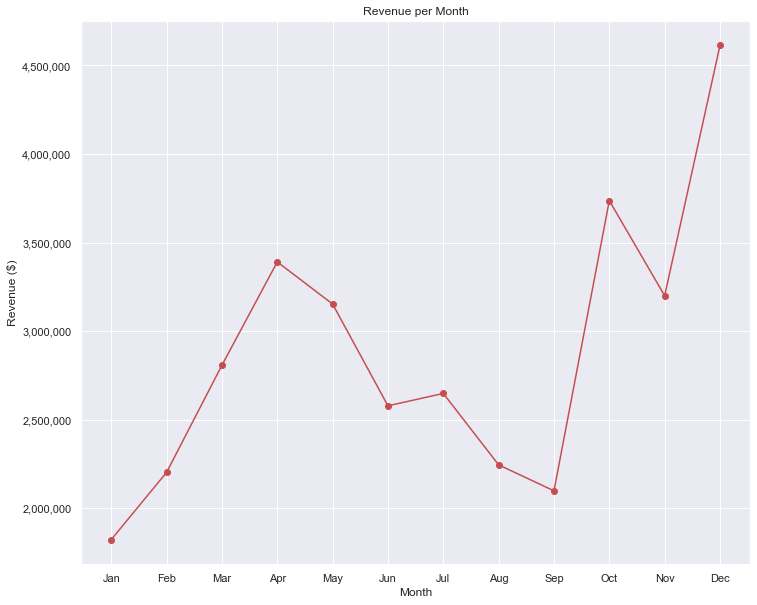

In [262]:
fig = plt.figure()
ax = plt.axes()

x = revenue_by_month['Month']
y = revenue_by_month['Revenue']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Revenue per Month")
plt.xlabel("Month")
plt.ylabel("Revenue ($)");

### 3.2 What city has the highest number of sales?

#### 3.2.1 Split address column appropriately

In [263]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9


In [264]:
combined['Street'] = [x.split(',')[0] for x in combined['Purchase Address']]
combined['City'] = [x.split(',')[1] for x in combined['Purchase Address']]
combined['State'] = [x.split(',')[2][0:3] for x in combined['Purchase Address']]
combined['Postal Code'] = [x.split(',')[2][3:] for x in combined['Purchase Address']]

In [265]:
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001


In [266]:
combined['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

#### 3.2.2 Group by city

In [267]:
by_city = combined[['City', 'State', 'Revenue']].groupby(['City', 'State']).sum().sort_values('Revenue', ascending=False).reset_index().round(2)
by_city

,City,State,Revenue
0,San Francisco,CA,8262203.91
1,Los Angeles,CA,5452570.80
2,New York City,NY,4664317.43
3,Boston,MA,3661642.01
4,Atlanta,GA,2795498.58
5,Dallas,TX,2767975.40
6,Seattle,WA,2747755.48
7,Portland,OR,1870732.34
8,Austin,TX,1819581.75
9,Portland,ME,449758.27


In [268]:
combined['Revenue'].dtype

dtype('float64')

In [269]:
by_city['City State'] = by_city['City'] + by_city['State']

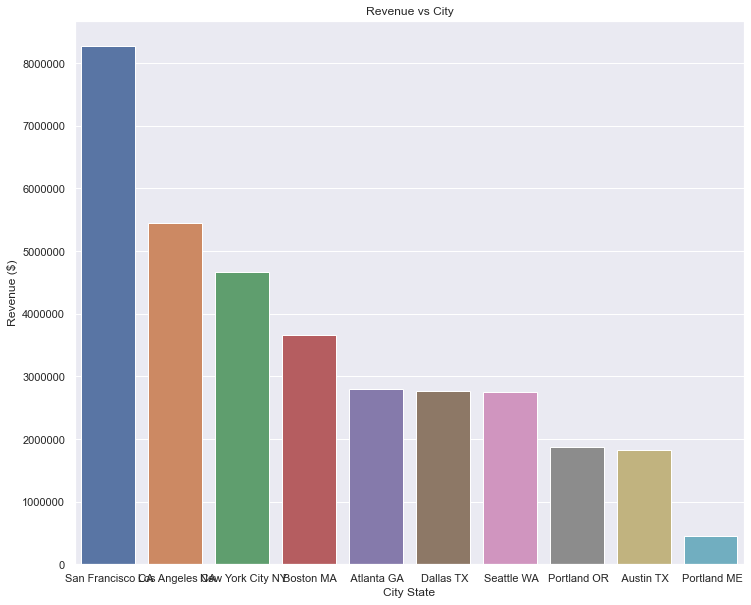

In [270]:
bar_chart = sns.barplot(x='City State', y='Revenue', data=by_city).set(title='Revenue vs City')

# gets rid of scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

# rename y
plt.ylabel('Revenue ($)')
plt.show()

### 3.3 What time of day should be display advertisements to maximise likelihood of customer buying?

#### 3.3.1 Split Order Date by time 

In [271]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,600.00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,11.99,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,2019,11.99,333 8th St,Los Angeles,CA,90001


In [272]:
combined['Hour of Day'] = combined['Order Date'].dt.hour
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001,8


#### 3.3.2 Group by time of day

In [273]:
by_time_of_day = combined[['Hour of Day', 'Quantity Ordered']].groupby(['Hour of Day']).count().reset_index()
by_time_of_day.head()

,Hour of Day,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854


In [274]:
by_time_of_day['Hour of Day'].dtype

dtype('int64')

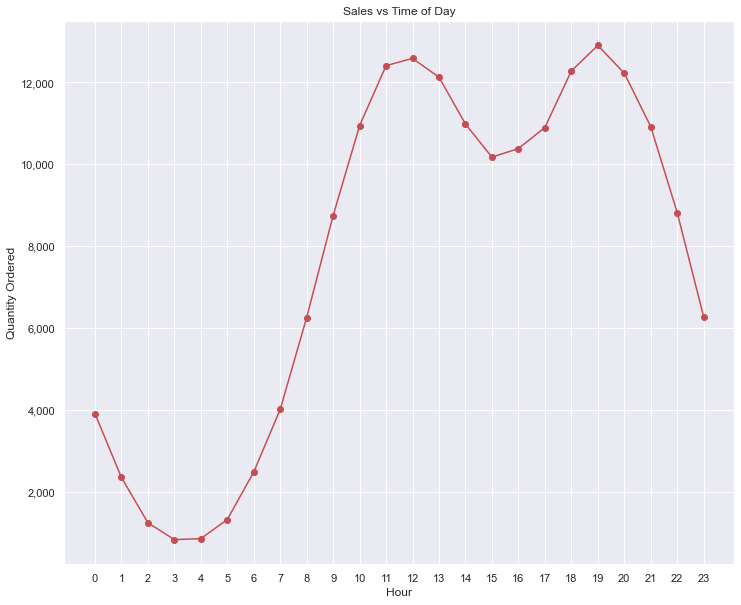

In [275]:
fig = plt.figure()
ax = plt.axes()

x = by_time_of_day['Hour of Day']
y = by_time_of_day['Quantity Ordered']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Sales vs Time of Day")
plt.xlabel("Hour")
plt.ylabel("Quantity Ordered");
plt.xticks(by_time_of_day['Hour of Day'])
plt.show()

#### 3.3.3 By Day of Month

In [276]:
combined['Day of Month'] = combined['Order Date'].dt.day
combined.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.9,917 1st St,Dallas,TX,75001,8,19


In [277]:
by_day = combined[['Day of Month', 'Quantity Ordered']].groupby(['Day of Month']).count().reset_index()
by_day.head()

,Day of Month,Quantity Ordered
0,1,6051
1,2,6197
2,3,5819
3,4,6066
4,5,6020


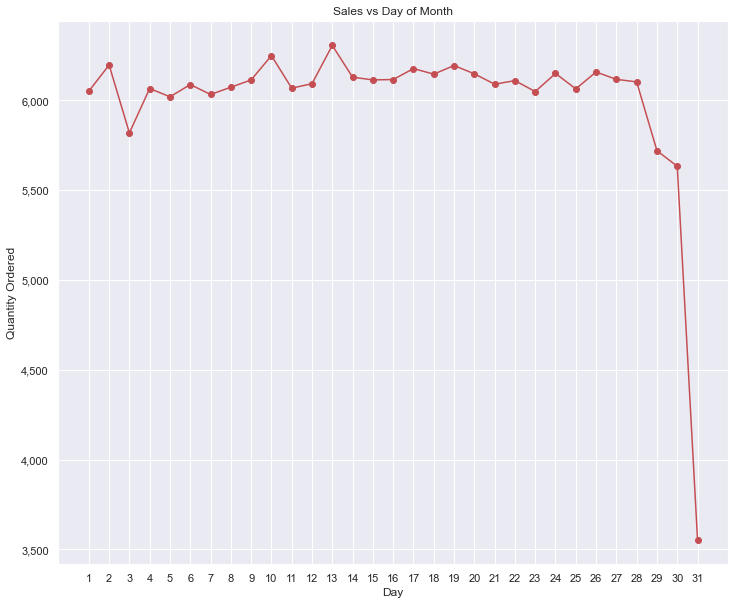

In [280]:
fig = plt.figure()
ax = plt.axes()

x = by_day['Day of Month']
y = by_day['Quantity Ordered']

plt.plot(x, y, marker='o', color='r')

# removes scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Sales vs Day of Month")
plt.xlabel("Day")
plt.ylabel("Quantity Ordered");
plt.xticks(by_day['Day of Month'])
plt.show()

Only 7 months of the year have 31 days which is why there is a drop off.

### 3.4 What products are most often sold together?

In [283]:
combined.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Revenue,Street,City,State,Postal Code,Hour of Day,Day of Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,2019,23.90,917 1st St,Dallas,TX,75001,8,19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,2019,99.99,682 Chestnut St,Boston,MA,02215,22,7


In [286]:
combined[['Order ID', 'Product', 'Order Date', 'Purchase Address']]

,Order ID,Product,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...
186845,259353,AAA Batteries (4-pack),2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


#### 3.4.1 Identify duplicates

In [295]:
most_sold_together = combined[['Order ID', 'Product', 'Order Date', 'Purchase Address']]
most_sold_together

,Order ID,Product,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...
186845,259353,AAA Batteries (4-pack),2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [309]:
most_sold_together.duplicated(['Order ID'])

0         False
2         False
3         False
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 185950, dtype: bool

Look at duplicate ID

In [315]:
duplicates = pd.concat(g for _, g in most_sold_together.groupby("Order ID") if len(g) > 1)
duplicates

,Order ID,Product,Order Date,Purchase Address
67588,141275,USB-C Charging Cable,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
67589,141275,Wired Headphones,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
67604,141290,Apple Airpods Headphones,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
67605,141290,AA Batteries (4-pack),2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
67680,141365,Vareebadd Phone,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...
55422,319584,Wired Headphones,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035"
55434,319596,iPhone,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
55435,319596,Lightning Charging Cable,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001"
55470,319631,34in Ultrawide Monitor,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301"


#### 3.4.2 Group By Order ID

In [ ]:
duplicates[['Order ID', 'Product']].groupby(['Order ID'])

## 4.

## 5.

## 6.